# DataScientists - Producto 3

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Nueva sección

###Instalación:

Primero de todo instalamos el geopandas utilizando el comando:

In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 16.7 MB 438 kB/s 
     |████████████████████████████████| 6.3 MB 57.6 MB/s 


## 2. Importamos los modulos necesarios

Ahora vamos a importar las librerías que vamos a usar, importaremos “pandas” como “pd” y geopandas como “gpd”, seaborn y numpy

In [3]:
import pandas as pd
import geopandas as gpd
import dateutil
from shapely.geometry import shape,Point,Polygon,mapping,LineString
import numpy as np
import seaborn as sns

#### b) Subiremos el archivo  csv descargado
Generaremos un fichero excel a partir del csv


In [6]:
read_file = pd.read_csv ("2017_accidents_gu_bcn.csv")
read_file.to_excel ("2017_accidents_gu_bcn.xlsx", index = None, header=True)

#### c) Leemos el fichero de excel
( excel_file es el path+nombre y lo volcamos en una variable),
luego leemos el contenido del fichero volcandolo en otra variable



In [7]:
excel_file = '2017_accidents_gu_bcn.xlsx'
accidents_BCN = pd.read_excel(excel_file)


#### d) Mostramos el fichero configurando que muestre las columnas activas

In [8]:
pd.options.display.max_columns= None
accidents_BCN

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,Descripcio_tipus_dia,Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
0,2017S008429,-1,Desconegut,-1,Desconegut,-1,Número 27 ...,Desconegut,Divendres,Dv,Laboral,2017,10,Octubre,13,8,Matí,Altres,0,2,0,2,2,426936.65,4577079.15,2.125624,41.340045
1,2017S007316,-1,Desconegut,-1,Desconegut,-1,Número 3 Zona Franca / Número 50 Zona Franca ...,Desconegut,Divendres,Dv,Laboral,2017,9,Setembre,1,13,Matí,No és causa del vianant,0,2,0,2,2,426503.22,4577014.83,2.120452,41.339426
2,2017S010210,-1,Desconegut,-1,Desconegut,-1,Litoral (Besòs) ...,K128,Divendres,Dv,Laboral,2017,12,Desembre,8,21,Tarda,No és causa del vianant,0,5,0,5,2,430450.5,4579358.49,2.167356,41.360886
3,2017S006364,-1,Desconegut,-1,Desconegut,-1,Número 3 Zona Franca ...,77-111,Divendres,Dv,Laboral,2017,7,Juliol,21,2,Nit,No és causa del vianant,0,1,0,1,2,426842.33,4576816.19,2.124529,41.337668
4,2017S004615,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa ...,0323 0325,Dijous,Dj,Laboral,2017,5,Maig,25,14,Tarda,No és causa del vianant,0,1,0,1,3,"432006,95","4585503,52",2.185272,41.416365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,2017S003667,9,Sant Andreu,59,el Bon Pastor,701266,Litoral (Llobregat) ...,140000,Dimarts,Dm,Laboral,2017,4,Abril,25,8,Matí,No és causa del vianant,0,1,0,1,3,"433866,55","4588278,91",2.201800,41.392004
10335,2017S001896,9,Sant Andreu,59,el Bon Pastor,321004,PL MONTERREY ...,0015 0015,Dimecres,Dc,Laboral,2017,3,Març,8,12,Matí,No és causa del vianant,0,1,0,1,2,"433608,87","4587774,14",2.206013,41.443445
10336,2017S010718,9,Sant Andreu,59,el Bon Pastor,151957,Litoral (Llobregat) ...,0009 0009,Dijous,Dj,Laboral,2017,12,Desembre,28,8,Matí,No és causa del vianant,0,1,0,1,2,"433877,14","4588218,15",2.205607,41.443894
10337,2017S006145,9,Sant Andreu,59,el Bon Pastor,151957,Litoral (Besòs) ...,0039 0039,Divendres,Dv,Laboral,2017,7,Juliol,14,14,Tarda,No és causa del vianant,0,1,0,1,2,"433625,82","4588678,66",2.205118,41.444824


#### e) creamos la matriz de correlacion

In [9]:
corr = accidents_BCN.corr()
corr



,Codi_districte,Codi_barri,Codi_carrer,Any,Mes_any,Dia_mes,Hora_dia,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
Codi_districte,1.000000,0.987703,0.155259,NaN,0.008264,-0.013961,-0.007478,-0.002664,0.016019,0.022454,0.021054,0.005845,-0.016650,-0.027589
Codi_barri,0.987703,1.000000,0.158968,NaN,0.010694,-0.014989,-0.008231,-0.003866,0.019622,0.024794,0.025158,0.004828,-0.017262,-0.022573
Codi_carrer,0.155259,0.158968,1.000000,NaN,0.059767,0.017053,-0.024849,-0.005197,0.040135,-0.004814,0.039212,0.046481,0.010308,-0.001510
Any,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mes_any,0.008264,0.010694,0.059767,NaN,1.000000,0.020074,0.001032,0.003663,0.024507,0.015151,0.028291,-0.021983,0.010146,0.003646
Dia_mes,-0.013961,-0.014989,0.017053,NaN,0.020074,1.000000,0.012877,-0.005612,0.006975,-0.001686,0.006407,-0.010914,-0.000058,0.011233
Hora_dia,-0.007478,-0.008231,-0.024849,NaN,0.001032,0.012877,1.000000,-0.020699,0.042420,-0.007614,0.040177,-0.022223,-0.008540,0.004133
Numero_morts,-0.002664,-0.003866,-0.005197,NaN,0.003663,-0.005612,-0.020699,1.000000,-0.041524,0.012492,0.007173,-0.020099,-0.001212,-0.001006
Numero_lesionats_lleus,0.016019,0.019622,0.040135,NaN,0.024507,0.006975,0.042420,-0.041524,1.000000,-0.150482,0.974272,0.160052,0.007273,-0.010551
Numero_lesionats_greus,0.022454,0.024794,-0.004814,NaN,0.015151,-0.001686,-0.007614,0.012492,-0.150482,1.000000,0.071450,-0.015678,-0.005048,-0.004201


#### f) Generamos una mascara para el triangulo superior


In [10]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

###Generamos a un mapa de color divergente

In [11]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)




Dibujamos un mapa de calor con la mascara creada 

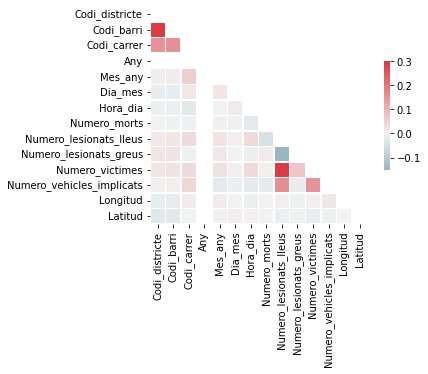

In [ ]:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



 REGRESION LINEAL SIMPLE

Importamos el csv y printamos las columnas

In [ ]:
ACCIDENTS_BCN_CSV = pd.read_csv ("2017_accidents_gu_bcn.csv")
ACCIDENTS_BCN_CSV.columns

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal',
       'Descripcio_dia_setmana', 'Dia_setmana', 'Descripcio_tipus_dia', 'Any',
       'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia', 'Descripcio_torn',
       'Descripcio_causa_vianant', 'Numero_morts', 'Numero_lesionats_lleus',
       'Numero_lesionats_greus', 'Numero_victimes',
       'Numero_vehicles_implicats', 'Coordenada_UTM_X', 'Coordenada_UTM_Y',
       'Longitud', 'Latitud'],
      dtype='object')

#### h) Importamos la api de statsmodel


In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Creamos un modelo ajustado en una linea (Quantitative response=Hora_dia; and predictor=Numero_morts).

In [ ]:
lm = smf.ols(formula='Hora_dia ~ Numero_victimes', data=ACCIDENTS_BCN_CSV).fit()

Printamos los coeficientes de regresion

In [ ]:
lm.params

Intercept          13.468930
Numero_victimes     0.290557
dtype: float64

Hacemos una inspeccion del total de los resultados

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Hora_dia   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     16.71
Date:                Fri, 06 May 2022   Prob (F-statistic):           4.38e-05
Time:                        16:37:58   Log-Likelihood:                -31936.
No. Observations:               10339   AIC:                         6.388e+04
Df Residuals:                   10337   BIC:                         6.389e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.4689      0.099    1

Printamos una recta con el modelo de regresion lineal

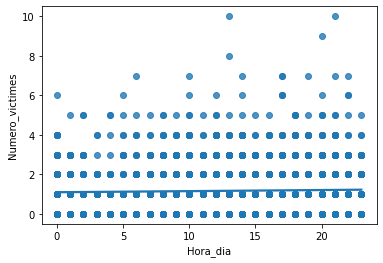

In [ ]:


sns.regplot(x='Hora_dia', y='Numero_victimes', data=ACCIDENTS_BCN_CSV)